<a href="https://colab.research.google.com/github/Valeria-i/PracticeRNN/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Загружаем библиотеки
import seaborn as sns
import tensorflow as tf
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#определяем размер будущего графика и убираем сетку (если False)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = True

In [ ]:
#пдключаем диск для подгрузки датасета
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#переходим в нужную директорию
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#загружаем файл csv
df = pd.read_csv('TestLearningMaterialsBasicDatasetSteamTurbine.csv')

In [ ]:
#проверяем корректность подгружаемых данных путем отображения первых 5 записей
df.head(5)

,Date Time,10MAA01CP001,10MAA01CT001,10LBG40CP920,10MAG10CP930,10LCA10CT001,10LBG11CP920,10LCA20CF001,10PAB10CF001,10PAB30CF001,10PAB10CT001,10PAB30CT001,10PAB20CT001,10PAB60CT001
0,1/1/22 1:00,6.28,491,104,10.85,44.37,0.51,182,3477,3319,28.06,28.44,44.72,44.48
1,1/1/22 2:00,6.14,489,103,10.41,44.08,0.50,182,3437,3444,28.23,29.30,44.02,44.50
2,1/1/22 3:00,6.13,489,103,10.10,45.75,0.50,180,3471,3410,29.72,29.88,44.23,44.33
3,1/1/22 4:00,6.17,490,104,10.89,45.84,0.49,191,3400,3416,30.01,30.72,44.54,44.92
4,1/1/22 5:00,6.10,491,104,10.46,45.64,0.51,184,3427,3333,29.34,28.32,44.94,44.45


In [ ]:
#делим датасет на слайсы для построения релевантного графика
#df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
df = df[5::10]
#проверяем отображение колонок
df.columns



Index(['Date Time', '10MAA01CP001', '10MAA01CT001', '10LBG40CP920',
       '10MAG10CP930', '10LCA10CT001', '10LBG11CP920', '10LCA20CF001',
       '10PAB10CF001', '10PAB30CF001', '10PAB10CT001', '10PAB30CT001',
       '10PAB20CT001', '10PAB60CT001'],
      dtype='object')

In [ ]:
#подгоняем формат даты для дальнейших манипуляций
date_time = pd.to_datetime(df.pop('Date Time'), infer_datetime_format=True)

<ipython-input-12-2e43e41e07b3>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  date_time = pd.to_datetime(df.pop('Date Time'), infer_datetime_format=True)
<ipython-input-12-2e43e41e07b3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(df.pop('Date Time'), infer_datetime_format=True)


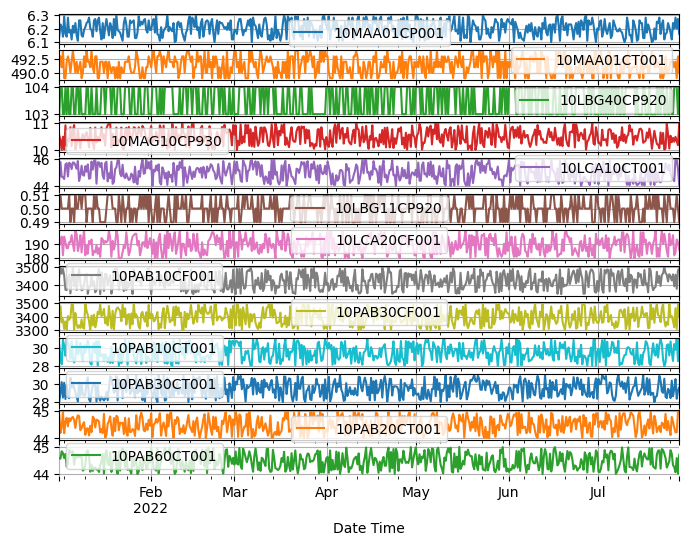

In [ ]:
#строим графики (в моем случае для всех критериев)

plot_cols = ['10MAA01CP001', '10MAA01CT001', '10LBG40CP920', '10MAG10CP930',
       '10LCA10CT001', '10LBG11CP920', '10LCA20CF001', '10PAB10CF001',
       '10PAB30CF001', '10PAB10CT001', '10PAB30CT001', '10PAB20CT001',
       '10PAB60CT001']

plot_features = df[plot_cols]
plot_features.index = date_time[:]
#делим графики на подграфики
_ = plot_features.plot(subplots=True)

# Изменение внешнего вида
plt.grid(True)
plt.box(False)

# Отображение графика
plt.show()

In [ ]:
#Возникла проблема с отображением данных вида: "5,14", оказалось, что данные записаны в типе object, что не дает построить график

df[plot_cols].dtypes

10MAA01CP001    float64
10MAA01CT001      int64
10LBG40CP920      int64
10MAG10CP930    float64
10LCA10CT001    float64
10LBG11CP920    float64
10LCA20CF001      int64
10PAB10CF001      int64
10PAB30CF001      int64
10PAB10CT001    float64
10PAB30CT001    float64
10PAB20CT001    float64
10PAB60CT001    float64
dtype: object

In [ ]:
#написана функция для замены знака "," на ".", чтобы стало возможным перейти к типу данных float
import csv
def replace_commas_with_dots(filename):
    """
    Заменяет запятые на точки в значениях заданного столбца CSV-файла.

    Args:
        filename: Имя CSV-файла.
    """

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)

    # Выберите номер столбца, в котором нужно заменить запятые
    column_index = 13  # Например, второй столбец (индекс 1)

    for row in rows:
        # Проверьте, есть ли в ячейке значение
        if row[column_index]:
            # Замените запятые на точки в значении
            row[column_index] = row[column_index].replace(',', '.')

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(rows)

# Пример использования:
replace_commas_with_dots('TestLearningMaterialsBasicDatasetSteamTurbine.csv')

In [ ]:
#преобразование типа данных для столбца
df['10PAB10CT001'] = df['10PAB10CT001'].astype(float)

In [ ]:
 df.columns

Index(['10MAA01CP001', '10MAA01CT001', '10LBG40CP920', '10MAG10CP930',
       '10LCA10CT001', '10LBG11CP920', '10LCA20CF001', '10PAB10CF001',
       '10PAB30CF001', '10PAB10CT001', '10PAB30CT001', '10PAB20CT001',
       '10PAB60CT001'],
      dtype='object')

In [ ]:
#проверка количества строк, используемых для построения графиков
len(df)

500

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
10MAA01CP001,500.0,6.20324,0.056120,6.10,6.16,6.200,6.2500,6.30
10MAA01CT001,500.0,491.40600,1.643949,489.00,490.00,492.000,493.0000,494.00
10LBG40CP920,500.0,103.50600,0.500465,103.00,103.00,104.000,104.0000,104.00
10MAG10CP930,500.0,10.49586,0.279736,10.00,10.27,10.480,10.7500,11.00
10LCA10CT001,500.0,44.99420,0.562209,44.00,44.53,44.995,45.4700,46.00
10LBG11CP920,500.0,0.49994,0.007176,0.49,0.49,0.500,0.5100,0.51
10LCA20CF001,500.0,189.32600,5.662495,180.00,185.00,189.000,194.0000,199.00
10PAB10CF001,500.0,3422.33400,42.959533,3350.00,3385.00,3422.000,3460.2500,3499.00
10PAB30CF001,500.0,3395.65000,56.518352,3301.00,3350.75,3393.000,3441.2500,3499.00
10PAB10CT001,500.0,29.50270,0.871767,28.00,28.76,29.485,30.2325,31.00


In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<ipython-input-23-4ec9be458a7e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(df.keys(), rotation=90)


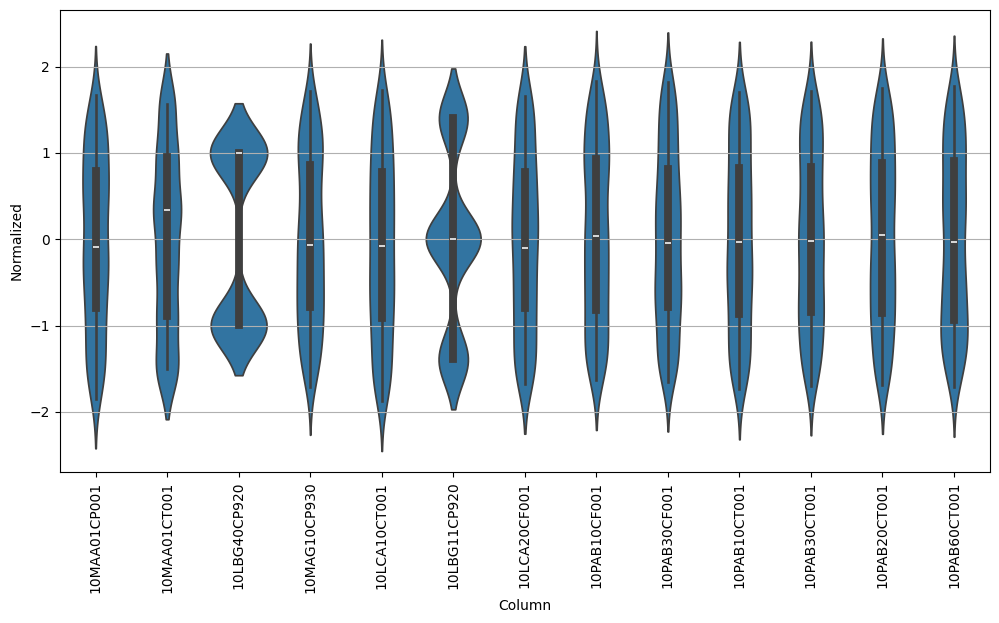

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['10MAA01CP001'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['10MAA01CP001']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['10MAA01CP001'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['10MAA01CP001']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 13)
Inputs shape: (3, 6, 13)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='10MAA01CP001', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

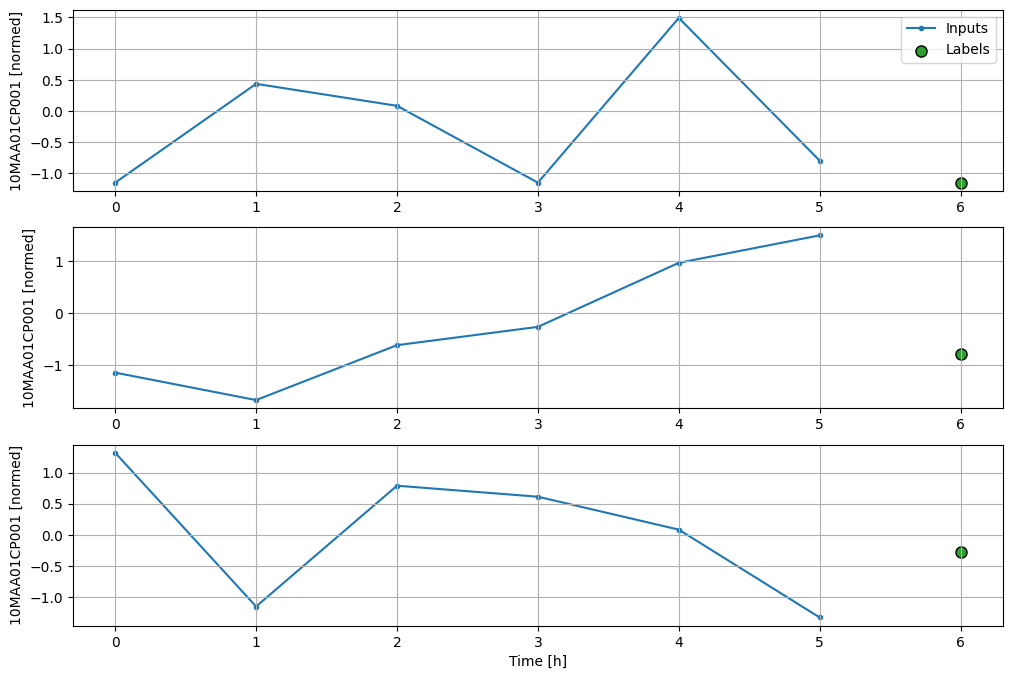

In [ ]:
w2.plot()

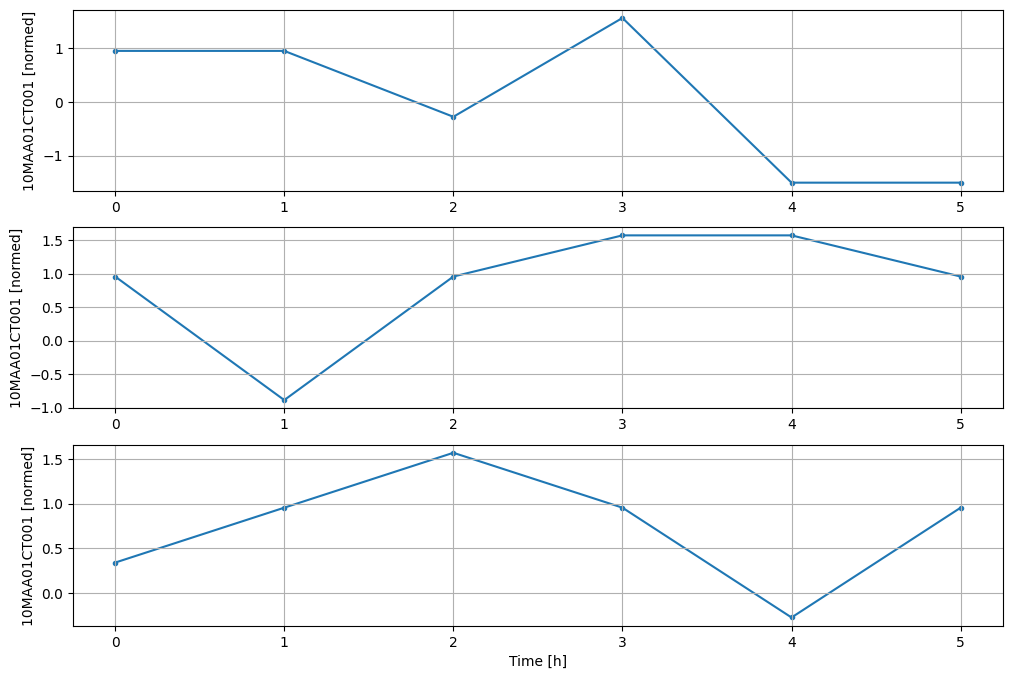

In [ ]:
w2.plot(plot_col='10MAA01CT001')

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 13), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 13)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['10MAA01CP001'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['10MAA01CP001']

In [ ]:
rnn_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1),

])
rnn_model.layers[-1].kernel_regularizer = tf.keras.regularizers.l1(0.01)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', rnn_model(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


In [ ]:
# MAX_EPOCHS = 5

# def compile_and_fit(model, window, patience=2):
#   early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')

#   model.compile(loss=tf.losses.MeanSquaredError(),
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#   history = model.fit(window.train, epochs=MAX_EPOCHS,
#                       validation_data=window.val,
#                       callbacks=[early_stopping])
#   return history

from tensorflow.keras.callbacks import ReduceLROnPlateau

MAX_EPOCHS = 20  # Увеличено число эпох
PATIENCE = 5     # Увеличено терпение EarlyStopping

def compile_and_fit(model, window, patience=PATIENCE):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.RMSprop(), # Попробовать другие оптимизаторы
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping, reduce_lr])
  return history

# Обучение модели
history = compile_and_fit(rnn_model, wide_window)

# Оценка
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['RNN'] = rnn_model.evaluate(wide_window.val)
performance['RNN'] = rnn_model.evaluate(wide_window.test, verbose=0)




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3126 - mean_absolute_error: 0.9118 


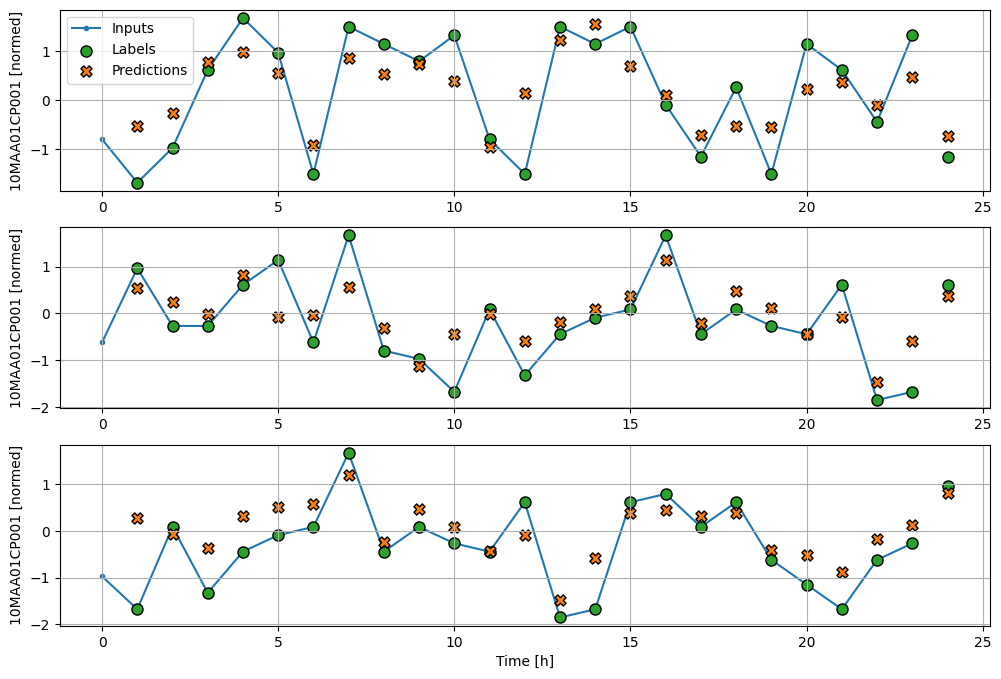

In [ ]:
wide_window.plot(rnn_model)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4313 - mean_absolute_error: 0.9455 


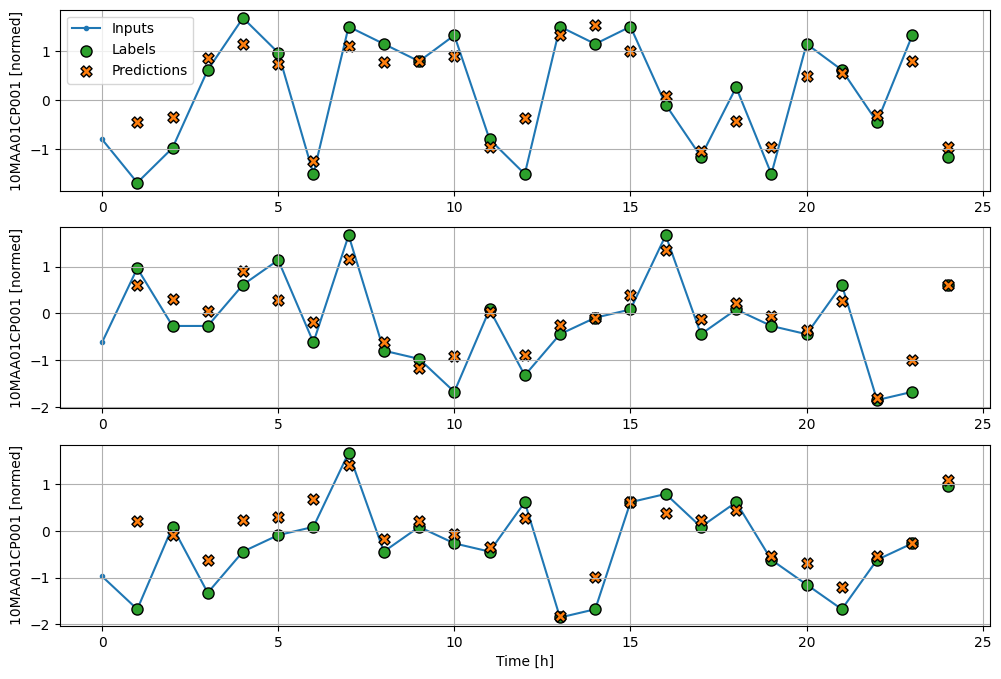

In [ ]:
history = compile_and_fit(rnn_model, wide_window)
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['RNN'] = rnn_model.evaluate(wide_window.val)
performance['RNN'] = rnn_model.evaluate(wide_window.test, verbose=0)

wide_window.plot(rnn_model)

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV

# Определение модели
def create_model(units=32, dropout=0.2):
  model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(units, return_sequences=True),
      tf.keras.layers.Dropout(dropout),
      tf.keras.layers.Dense(1)
  ])
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.RMSprop(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model

# Создание модели Keras
model = KerasClassifier(build_fn=create_model)

# Определение параметров для Grid Search
param_grid = {
    'units': [16, 32, 64],
    'dropout': [0.1, 0.2, 0.3],
}

# Создание объекта GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Поиск оптимальных гиперпараметров
grid_result = grid.fit(window.train, window.train_labels)

# Вывод лучших параметров
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

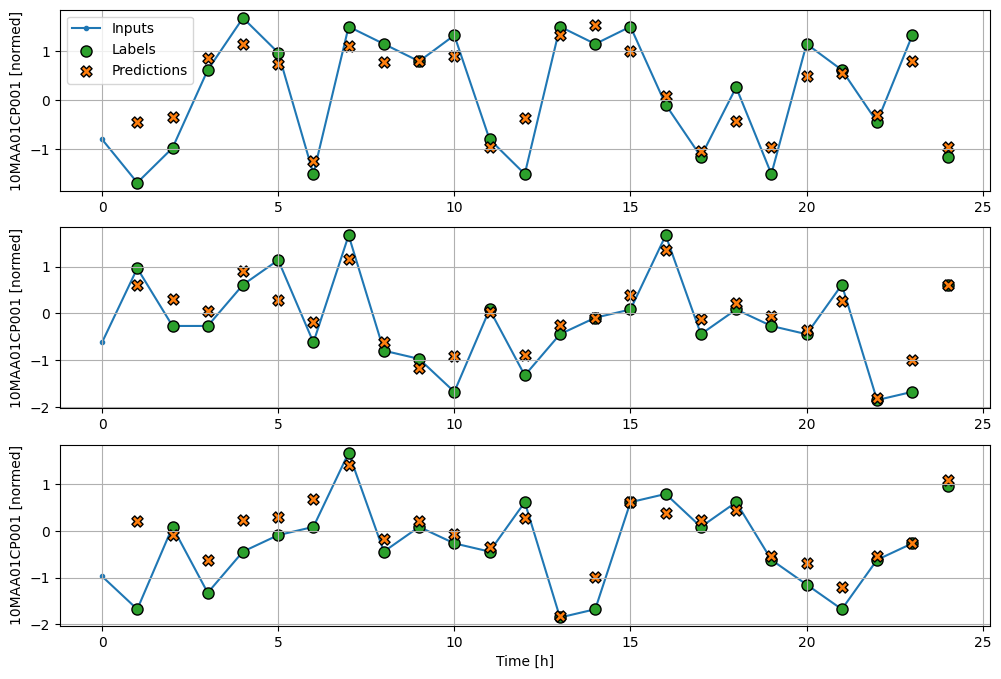

In [ ]:
wide_window.plot(rnn_model)

In [ ]:
pip install --upgrade keras

In [ ]:
 pip install --upgrade tensorflow

In [ ]:
## Anytime you want to open a terminal
# import the module once
from google_colab_shell import getshell
getshell() # custom height of the terminal

In [ ]:
pip install google-colab-shell